# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
from datetime import datetime

# Import API key from a file that is ignored by Git (.gitignore file) so the key isn't exposed to the public
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

In [18]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations and zip into a list of tuples
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination using the Citypy package to return a unique city and country code
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country)

# Combine the two lists into a list of tuples using the zip function
city_country = zip(cities,countries)

# Print the city count to confirm sufficient count ( Greater than 500 )
print(len(cities))

628


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# set up lists to hold reponse info
city_id = []
city_name = []
country = []
latitude = []
longitude = []
weather_date = []
temp = []
humidity = []
cloudiness = []
wind_speed = []

# Open file to write results of API calls - success or not into a txt file, as well as all data pulled into a csv
myprintlog = open('weatherAPI_printlog.txt', 'w')
myAPIdata = open('weatherAPI_data.csv', 'w')

# Write header line for csv file
myAPIdata.write("city_id,city_name,country,latitude,longitude,weather_date,temp,humidity,cloudiness,wind_speed\n")

# Loop through the list of tuples of cities,country codes and perform a request for data on each
for city,country_code in city_country:
    query_url = f"{url}appid={weather_api_key}&q={city},{country_code}&units={units}"
    response = requests.get(query_url).json()

    # Try to grab the temp,humidity,cloudiness and wind speed if they are available in the Weather API
    # if the city is not found on the WeatherAPI site then the "except" will catch the error and the loop will
    # continue to go through the rest of the city,country_codes in the city_country list
    try:
        # Create variables for each response item and format to desired datatype
        cityID = int(response['id'])
        cityName = response['name']
        countryCode = response['sys']['country']
        lat_val = response['coord']['lat']
        lon_val = response['coord']['lon']
        weatherDate = (datetime.fromtimestamp(response['dt'])).strftime('%m/%d/%y')
        temperature = response['main']['temp']
        humidity_val = response['main']['humidity']
        cloudiness_val = response['clouds']['all']
        windSpeed = response['wind']['speed']
        
        # Append retreived values to lists above using the variables created above
        city_id.append(cityID)
        city_name.append(cityName)
        country.append(countryCode)
        latitude.append(lat_val)
        longitude.append(lon_val)
        weather_date.append(weatherDate)
        temp.append(temperature)
        humidity.append(humidity_val)
        cloudiness.append(cloudiness_val)
        wind_speed.append(windSpeed)
        
        # Output line to terminal to mark progress and store it to a print log text file
        print(f"{cityName} with city ID:{cityID} was found in the Weathermap API\n")
        myprintlog.write(f"{cityName} with city ID:{cityID} was found in the Weathermap API\n")
        
        # Output all retreived values to a csv file
        myAPIdata.write(f"{cityID},{cityName},{countryCode},{lat_val},{lon_val},{weatherDate},\
            {temperature},{humidity_val},{cloudiness_val},{windSpeed}\n")
        
        # Handle exceptions for a city that is not available in the Weather API
    except:
        
        print(f"{city},{country_code} was not found in the Weathermap API\n")
        myprintlog.write(f"{city},{country_code} was not found in the Weathermap API\n")
        
        # Append null values so lists are all the same length (later we will remove nulls from dataframe)
        city_id.append(None)
        city_name.append(None)
        country.append(None)
        latitude.append(None)
        longitude.append(None)
        weather_date.append(None)
        temp.append(None)
        humidity.append(None)
        cloudiness.append(None)
        wind_speed.append(None)
        pass
    
# Close the file handle after completion of the loop
myprintlog.close()
myAPIdata.close()

Hermanus with city ID:3366880 was found in the Weathermap API

Redlands with city ID:5386754 was found in the Weathermap API

Salalah with city ID:286621 was found in the Weathermap API

Saint-Philippe with city ID:935215 was found in the Weathermap API

Harper with city ID:2276492 was found in the Weathermap API

Northfield with city ID:5039675 was found in the Weathermap API

Galle with city ID:1246294 was found in the Weathermap API

Pevek with city ID:2122090 was found in the Weathermap API

Moerai with city ID:4034188 was found in the Weathermap API

Jumla with city ID:1283285 was found in the Weathermap API

mys shmidta,ru was not found in the Weathermap API

Port Elizabeth with city ID:964420 was found in the Weathermap API

Hobart with city ID:2163355 was found in the Weathermap API

Islamkot with city ID:1176608 was found in the Weathermap API

Kourou with city ID:3381303 was found in the Weathermap API

Vila Velha with city ID:3445026 was found in the Weathermap API

Ushuaia 

Kargil with city ID:1267776 was found in the Weathermap API

Tuktoyaktuk with city ID:6170031 was found in the Weathermap API

amderma,ru was not found in the Weathermap API

Bibiani with city ID:2303060 was found in the Weathermap API

Sakaiminato with city ID:1853174 was found in the Weathermap API

Ostrovnoy with city ID:556268 was found in the Weathermap API

Saldanha with city ID:3361934 was found in the Weathermap API

Bumba with city ID:217745 was found in the Weathermap API

Zhigansk with city ID:2012530 was found in the Weathermap API

Heraclea with city ID:315498 was found in the Weathermap API

Husavik with city ID:2629833 was found in the Weathermap API

Charters Towers with city ID:2171722 was found in the Weathermap API

Fairbanks with city ID:5861897 was found in the Weathermap API

Barrow with city ID:5880054 was found in the Weathermap API

Roma with city ID:2151187 was found in the Weathermap API

Thurso with city ID:2635881 was found in the Weathermap API

Caconda wi

tabukiniberu,ki was not found in the Weathermap API

Iqaluit with city ID:5983720 was found in the Weathermap API

Montepuez with city ID:1037125 was found in the Weathermap API

Gainesville with city ID:4156404 was found in the Weathermap API

Namatanai with city ID:2090021 was found in the Weathermap API

Honiara with city ID:2108502 was found in the Weathermap API

Lompoc with city ID:5367788 was found in the Weathermap API

tumannyy,ru was not found in the Weathermap API

Krasnyy Chikoy with city ID:2012349 was found in the Weathermap API

Vredendal with city ID:3359736 was found in the Weathermap API

Kumul with city ID:1529484 was found in the Weathermap API

Katiola with city ID:2287298 was found in the Weathermap API

grand river south east,mu was not found in the Weathermap API

Zuwārah with city ID:2208425 was found in the Weathermap API

zuwarah,ly was not found in the Weathermap API

Fare with city ID:4034496 was found in the Weathermap API

Guisijan with city ID:1712224 wa

Ahipara with city ID:2194098 was found in the Weathermap API

San Fernando with city ID:3483197 was found in the Weathermap API

Baker City with city ID:5712169 was found in the Weathermap API

Ancud with city ID:3899695 was found in the Weathermap API

Quatre Cocos with city ID:1106643 was found in the Weathermap API

Borogontsy with city ID:2026160 was found in the Weathermap API

Uglovoye with city ID:690820 was found in the Weathermap API

Vryburg with city ID:942511 was found in the Weathermap API

Mount Gambier with city ID:2156643 was found in the Weathermap API

Itarema with city ID:3393692 was found in the Weathermap API

Aklavik with city ID:5882953 was found in the Weathermap API

promakhoi,gr was not found in the Weathermap API

Leh with city ID:1264976 was found in the Weathermap API

Sabha with city ID:2212775 was found in the Weathermap API

ust-kamchatsk,ru was not found in the Weathermap API

jabiru,au was not found in the Weathermap API

Padang with city ID:1633419 wa

Salekhard with city ID:1493197 was found in the Weathermap API

Emerald with city ID:2167426 was found in the Weathermap API

Blagoyevo with city ID:576093 was found in the Weathermap API

Lleida with city ID:3118514 was found in the Weathermap API

Mutatá with city ID:3674130 was found in the Weathermap API

Pisco with city ID:3932145 was found in the Weathermap API

Pandan with city ID:1695546 was found in the Weathermap API

Belize with city ID:3582678 was found in the Weathermap API

Rebrikha with city ID:1493722 was found in the Weathermap API

Linköping with city ID:2694762 was found in the Weathermap API

Changying with city ID:6958004 was found in the Weathermap API

Stornoway with city ID:2636790 was found in the Weathermap API

Owando with city ID:2255542 was found in the Weathermap API

Riyadh with city ID:108410 was found in the Weathermap API

Cleburne with city ID:4681976 was found in the Weathermap API

Batemans Bay with city ID:2176639 was found in the Weathermap API

G

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
# create a dictionary from the lists that we created above
weather_dict = {
    "city_id": city_id,
    "city_name": city_name,
    "country": country,
    "latitude": latitude,
    "longitude": longitude,
    "weather_date": weather_date,
    "temp": temp,
    "humidity": humidity,
    "cloudiness": cloudiness,
    "wind_speed": wind_speed
}

# Use the dictionary to create a dataframe named weather_data
cities_temps_df = pd.DataFrame(weather_dict)
cities_temps_df.head()

,city_id,city_name,country,latitude,longitude,weather_date,temp,humidity,cloudiness,wind_speed
0,3366880.0,Hermanus,ZA,-34.42,19.23,11/05/20,64.0,90.0,100.0,5.01
1,5386754.0,Redlands,US,34.06,-117.18,11/05/20,87.4,12.0,96.0,1.77
2,286621.0,Salalah,OM,17.02,54.09,11/05/20,75.2,57.0,0.0,6.93
3,935215.0,Saint-Philippe,RE,-21.36,55.77,11/05/20,71.6,64.0,39.0,5.82
4,2276492.0,Harper,LR,4.38,-7.72,11/05/20,79.2,86.0,0.0,7.34


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [14]:
# --- find cities that have humidity over 100% ---
humidity_over_100 = cities_temps_df.loc[cities_temps_df["humidity"] > 100, :]

if humidity_over_100.empty == True:
    print("There are no cities with humidity values over 100%")
    print("Using original dataframe to continue with plotting...")
    
    # --- extract relevant fields from the data frame for plotting ---
    latitudes = cities_temps_df["latitude"]
    temperatures = cities_temps_df["temp"]
    humidity = cities_temps_df["humidity"]
    cloudiness = cities_temps_df["cloudiness"]
    windspeed = cities_temps_df["wind_speed"]
    
else:
    # -- get the indices of cities that have humidity over 100% ---
    Humidityover100Index = humidity_over_100.index
    
    # --- create a clean DataFrame by dropping all humidity outliers by index found above ---
    clean_city_data = cities_temps_df.drop(Humidityover100Index).reset_index(drop=True)
    clean_city_data.head()
    
    # --- extract relevant fields from the data frame for plotting ---
    latitudes = clean_city_data["latitude"]
    temperatures = clean_city_data["temp"]
    humidity = clean_city_data["humidity"]
    cloudiness = clean_city_data["cloudiness"]
    windspeed = clean_city_data["wind_speed"]

    # --- export the new dataframe into a csv ---
    clean_city_data.to_csv("../output_data/clean_city_data.csv", index=True, index_label="City ID", header=True)

There are no cities with humidity values over 100%
Using original dataframe to continue with plotting...


In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

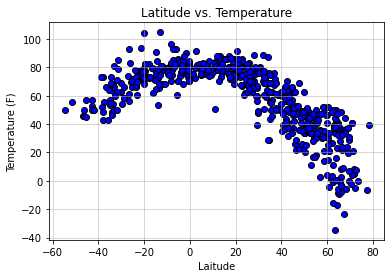

In [29]:
# Create Latitude vs. Temperature Plot
plt.scatter(weather_dict["latitude"], weather_dict["temp"], facecolor = "blue", edgecolor = "black")

# Set title
plt.title("Latitude vs. Temperature")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Temperature (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save plotted figure as .png file
plt.savefig("../images/latitude_temperature_plot.png")

## Latitude vs. Humidity Plot

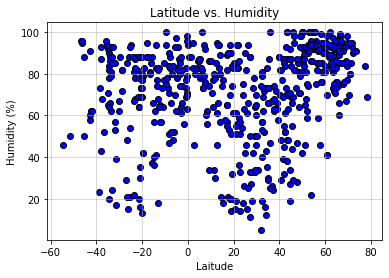

In [30]:
# Create Latitude vs. Humidity Plot
plt.scatter(weather_dict["latitude"], weather_dict["humidity"], facecolor = "blue", edgecolor = "black")

# Set title
plt.title("Latitude vs. Humidity")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save plotted figure as .png file
plt.savefig("../images/latitude_humidity_plot.png")

## Latitude vs. Cloudiness Plot

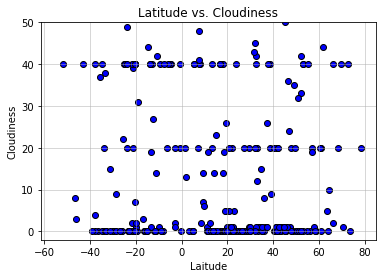

In [34]:
# Create Latitude vs. Coudiness Plot
plt.scatter(weather_dict["latitude"], weather_dict["cloudiness"], facecolor = "blue", edgecolor = "black")
plt.title("Latitude vs. Cloudiness")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Cloudiness")

# Set y axis limit
plt.ylim(-2,50)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save plotted figure as .png file
plt.savefig("../images/latitude_cloudiness_plot.png")

## Latitude vs. Wind Speed Plot

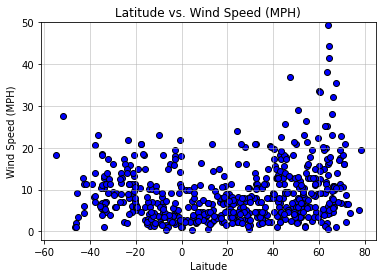

In [32]:
# Create Latitude vs. Wind Speed Plot
plt.scatter(weather_dict["latitude"], weather_dict["wind_speed"], facecolor = "blue", edgecolor = "black")
plt.title("Latitude vs. Wind Speed (MPH)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Wind Speed (MPH)")

# Set y axis limit
plt.ylim(-2,50)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save plotted figure as .png file
plt.savefig("../images/latitude_Wind_speed_plot.png")

## Linear Regression

In [61]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = cities_temps_df.loc[cities_temps_df["latitude"]>0.01]
southern_hemisphere = cities_temps_df.loc[cities_temps_df["latitude"]<-0.01]

# northern_hemisphere.head()
northern_hemisphere.head()

# southern_hemisphere.head()
southern_hemisphere.head()

,city_id,city_name,country,latitude,longitude,weather_date,temp,humidity,cloudiness,wind_speed
0,3366880.0,Hermanus,ZA,-34.42,19.23,11/05/20,64.00,90.0,100.0,5.01
3,935215.0,Saint-Philippe,RE,-21.36,55.77,11/05/20,71.60,64.0,39.0,5.82
8,4034188.0,Moerai,PF,-22.43,-151.33,11/05/20,77.41,82.0,96.0,15.84
11,964420.0,Port Elizabeth,ZA,-33.92,25.57,11/05/20,66.20,93.0,20.0,10.29
12,2163355.0,Hobart,AU,-42.88,147.33,11/05/20,52.45,58.0,40.0,12.75


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8445461027594724
y = -1.1x + 95.8


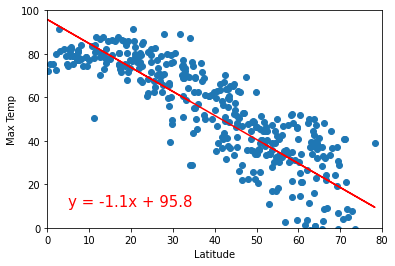

In [62]:
#Create a Scatter Plot for Norther Hemisphere: Max Temp vs. Latitude Linear Regression
x_values = northern_hemisphere['latitude']
y_values = northern_hemisphere['temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"red")
plt.annotate(line_eq,(5,10),fontsize=15,color="red")

plt.ylim(0,100)
plt.xlim(0, 80)

plt.ylabel("Max Temp")
plt.xlabel("Latitude")

print(f"The r-squared is: {rvalue}")
print(line_eq)

plt.savefig("../images/temp_lat_lingress.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.33873042781383217
y = 0.29x + 19.29


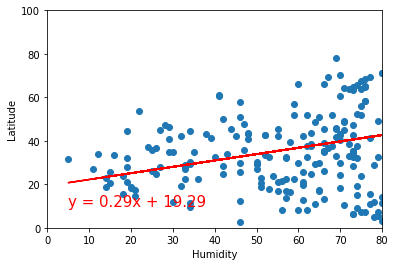

In [63]:
#Create a Scatter Plot for Northern Hemisphere: Humidity (%) vs. Latitude Linear Regression
x_values = northern_hemisphere['humidity']
y_values = northern_hemisphere['latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"red")
plt.annotate(line_eq,(5,10),fontsize=15,color="red")

plt.ylim(0,100)
plt.xlim(0, 80)

plt.ylabel("Latitude")
plt.xlabel("Humidity")

print(f"The r-squared is: {rvalue}")
print(line_eq)

plt.savefig("../images/humidity_lat_lingress.png")


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0921424964316923
y = 0.06x + -24.43


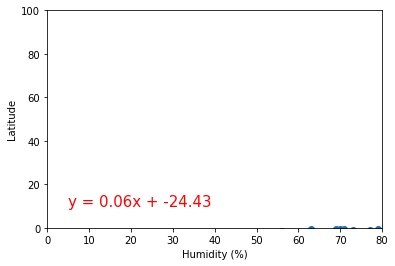

In [72]:
#Create a Scatter Plot for Southern Hemisphere: Humidity (%) vs. Latitude Linear Regression
x_values = southern_hemisphere['humidity']
y_values = southern_hemisphere['latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"red")
plt.annotate(line_eq,(5,10),fontsize=15,color="red")

plt.ylim(0,100)
plt.xlim(0, 80)

plt.ylabel("Latitude")
plt.xlabel("Humidity (%)")

print(f"The r-squared is: {rvalue}")
print(line_eq)

plt.savefig("../images/sh_humidity_lat_lingress.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.34511246824971675
y = 0.16x + 31.93


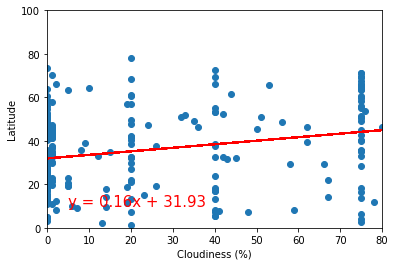

In [65]:
#Create a Scatter Plot for Northern Hemisphere: Cloudiness (%) vs. Latitude Linear Regression
x_values = northern_hemisphere['cloudiness']
y_values = northern_hemisphere['latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"red")
plt.annotate(line_eq,(5,10),fontsize=15,color="red")

plt.ylim(0,100)
plt.xlim(0, 80)

plt.ylabel("Latitude")
plt.xlabel("Cloudiness (%)")

print(f"The r-squared is: {rvalue}")
print(line_eq)

plt.savefig("../images/cloudiness_lat_lingress.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.1381329766762131
y = 0.04x + -22.63


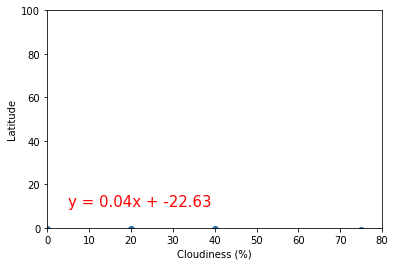

In [71]:
#Create a Scatter Plot for Southern Hemisphere: Cloudiness (%) vs. Latitude Linear Regression
x_values = southern_hemisphere['cloudiness']
y_values = southern_hemisphere['latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"red")
plt.annotate(line_eq,(5,10),fontsize=15,color="red")

plt.ylim(0,100)
plt.xlim(0, 80)

plt.ylabel("Latitude")
plt.xlabel("Cloudiness (%)")

print(f"The r-squared is: {rvalue}")
print(line_eq)

plt.savefig("../images/sh_cloudiness_lat_lingress.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.35686593908489866
y = 0.91x + 31.69


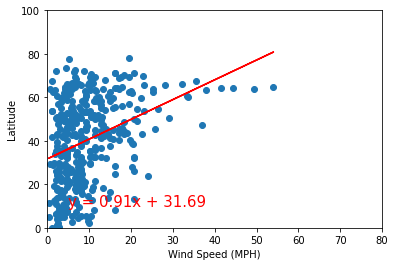

In [67]:
#Create a Scatter Plot for Southern Hemisphere: Wind Speed (MPH) vs. Latitude Linear Regression
x_values = northern_hemisphere['wind_speed']
y_values = northern_hemisphere['latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"red")
plt.annotate(line_eq,(5,10),fontsize=15,color="red")

plt.ylim(0,100)
plt.xlim(0, 80)

plt.ylabel("Latitude")
plt.xlabel("Wind Speed (MPH)")

print(f"The r-squared is: {rvalue}")
print(line_eq)

plt.savefig("../images/wind_speed_lat_lingress.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.16884466034574575
y = -0.39x + -17.02


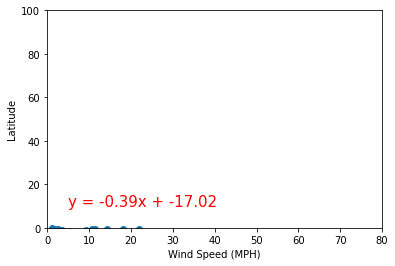

In [70]:
#Create a Scatter Plot for Southern Hemisphere: Wind Speed (MPH) vs. Latitude Linear Regression
x_values = southern_hemisphere['wind_speed']
y_values = southern_hemisphere['latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"red")
plt.annotate(line_eq,(5,10),fontsize=15,color="red")

plt.ylim(0,100)
plt.xlim(0, 80)

plt.ylabel("Latitude")
plt.xlabel("Wind Speed (MPH)")

print(f"The r-squared is: {rvalue}")
print(line_eq)

plt.savefig("../images/sh_wind_speed_lat_lingress.png")